In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generating data
x = np.linspace(-1, 1, 1000)
d = np.exp(x)

# adding a bit of noise
#d = d + 0.01*np.random.randn(len(x))

# a

In [3]:
#constructing the chebyshev polynomial
order = 10
cheb = np.zeros((order+1, len(x)))

#T_0 =1
cheb [0, :] = 1
#T_1 = x
cheb [1, :] = x

for i in range(2, order+1):
    for j in range (len(x)):
        cheb[i, j] = 2 * x[j] * cheb[i-1, j] - cheb[i-2, j]
        
A = cheb.T

RMS error after fit is 1.5653039306739285e-11


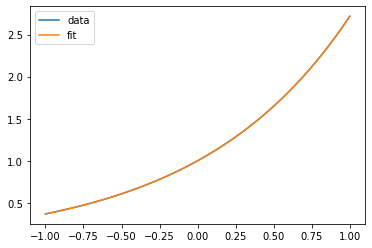

In [4]:
lhs=A.T@A
rhs=A.T@d
pp=np.linalg.inv(lhs)@rhs
pred=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred-d)**2))))

plt.plot(x, d, label= 'data')
plt.plot(x, pred, label = 'fit')
plt.legend()
plt.show()

# Higher order

 We can even go higher in the order, and the fit will stay stable.

RMS error after fit is 1.3395302035127714e-15


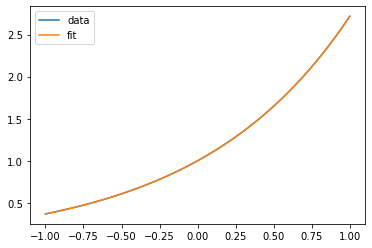

In [5]:
order = 20
cheb = np.zeros((order+1, len(x)))

#T_0 =1
cheb [0, :] = 1
#T_1 = x
cheb [1, :] = x

for i in range(2, order+1):
    for j in range (len(x)):
        cheb[i, j] = 2 * x[j] * cheb[i-1, j] - cheb[i-2, j]
        
A = cheb.T
lhs=A.T@A
rhs=A.T@d
pp=np.linalg.inv(lhs)@rhs
pred=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred-d)**2))))

plt.plot(x, d, label= 'data')
plt.plot(x, pred, label = 'fit')
plt.legend()
plt.show()

# b

# order = 6

In [6]:
order = 6
cheb = np.zeros((order+1, len(x)))

#T_0 =1
cheb [0, :] = 1
#T_1 = x
cheb [1, :] = x

for i in range(2, order+1):
    for j in range (len(x)):
        cheb[i, j] = 2 * x[j] * cheb[i-1, j] - cheb[i-2, j]
        
A = cheb.T

RMS error is 1.9852969888148452e-06
maximum error is 6.9968888354310366e-06


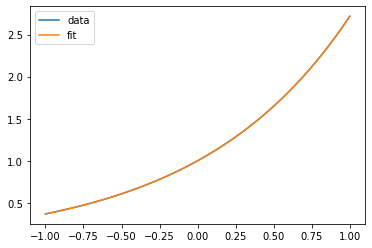

In [7]:
lhs=A.T@A
rhs=A.T@d
pp=np.linalg.inv(lhs)@rhs
pred_1=A@pp

print('RMS error is ' + repr(np.sqrt(np.mean((pred_1-d)**2))))
print('maximum error is ' + repr(np.max(pred_1-d)))

plt.plot(x, d, label= 'data')
plt.plot(x, pred, label= 'fit')
plt.legend()
plt.show()

# much higher order 

In [8]:
order = 100
cheb = np.zeros((order+1, len(x)))

#T_0 =1
cheb [0, :] = 1
#T_1 = x
cheb [1, :] = x

for i in range(2, order+1):
    for j in range (len(x)):
        cheb[i, j] = 2 * x[j] * cheb[i-1, j] - cheb[i-2, j]
        
A = cheb.T

In [9]:
lhs=A.T@A
rhs=A.T@d
pp=np.linalg.inv(lhs)@rhs

In [10]:
pp_new = pp[0:7]
print(pp_new.shape)

(7,)


In [11]:
A_new = A[:, 0:7]
A_new.shape

(1000, 7)

In [12]:
pred_2=A_new@pp_new

RMS error is 2.2588113162502583e-06
maximum error is 3.38627793849966e-06


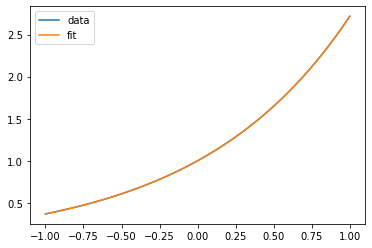

In [13]:
print('RMS error is ' + repr(np.sqrt(np.mean((pred_2-d)**2))))
print('maximum error is ' + repr(np.max(pred_2-d)))

plt.plot(x, d, label= 'data')
plt.plot(x, pred, label= 'fit')
plt.legend()
plt.show()

In [14]:
rms_high = np.sqrt(np.mean((pred_2-d)**2))
max_high = np.max(pred_2-d)

rms_low = np.sqrt(np.mean((pred_1-d)**2))
max_low = np.max(pred_1-d)

ratio_rms = rms_high/rms_low
ratio_max = max_high /max_low

In [15]:
print ('ratio of RMS error: ' + repr (ratio_rms*100) + ' %')
print ('ratio of maximum error: ' + repr (ratio_max*100)+ ' %')

ratio of RMS error: 113.77699804998404 %
ratio of maximum error: 48.396909228457844 %


We predicted that if we ignore some of the terms, the maximum error will decrease. On the other hand, the RMS error will increase in this case.

Our results exactly agree with our predictions.